In [1]:
import pandas as pd
from matplotlib import pyplot as plt

# Dataset

 Merchant Wholesalers, Except Manufacturers' Sales Branches and Offices: Nondurable Goods: Beer, Wine, and Distilled Alcoholic Beverages Sales

https://fred.stlouisfed.org/series/S4248SM144NCEN

In [2]:
df = pd.read_csv("./data/S4248SM144NCEN.csv", parse_dates=["DATE"])
df.head()

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [3]:
df = df.rename(columns={"DATE": "date", "S4248SM144NCEN": "sale"})

In [4]:
df.shape

(369, 2)

<AxesSubplot:xlabel='date'>

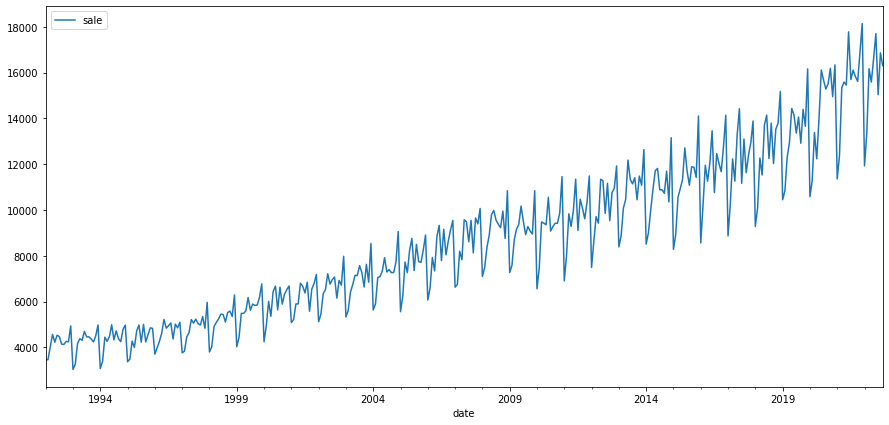

In [7]:
df.plot(x="date", y="sale", figsize=(15, 7))

SKU

# Модель ARIMA

Autoregressive Integrated Moving Average Model - авторегрессионная модель, которая состоит из трёх компонент:
- AR - авторегрессионной - каждое следующее значение вычисляется как линейная комбинация нескольких предыдущих значений. Количество учитываемых значений задаётся параметром **p**;

- MA - скользящего усреднения -каждое следующее значение вычисляется как линейная комбинация ошибок предсказаний авторегрессионной модели. Количество учитываемых значений - **q**.

- I - интегрирующей - чтобы сделать ряд стационарным, продифференцируем его один или несколько раз. Порядок дифференцирования - **d**.import statsmodels.api as sm 
import pylab as py 
  
# np.random generates different random numbers everytime the code is executed.
data_points = np.random.normal(0, 1, 100)     
  
sm.qqplot(data_points, line ='45') .

Также могут добавляться другие дополнительные компоненты:
- сезонность (S) - учитываем суточную, недельную, месячную периодичность сигнала;
- влияние внешний факторов (Exogenous Regressors, X)

В результате получаем целый букет моделей:
- AR;
- MA;
- ARMA;
- ARIMA;
- SARIMA;
- SARIMAX;
- ...fc, se, conf 

# Применение ARIMA

In [8]:
from statsmodels.tsa.arima.model import ARIMA

In [36]:
t = df.set_index("date")
t

,sale
date,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2022-05-01,16600
2022-06-01,17700
2022-07-01,15031


/home/frodos/.pyenv/versions/3.8.10/envs/ds/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/frodos/.pyenv/versions/3.8.10/envs/ds/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/frodos/.pyenv/versions/3.8.10/envs/ds/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='date'>

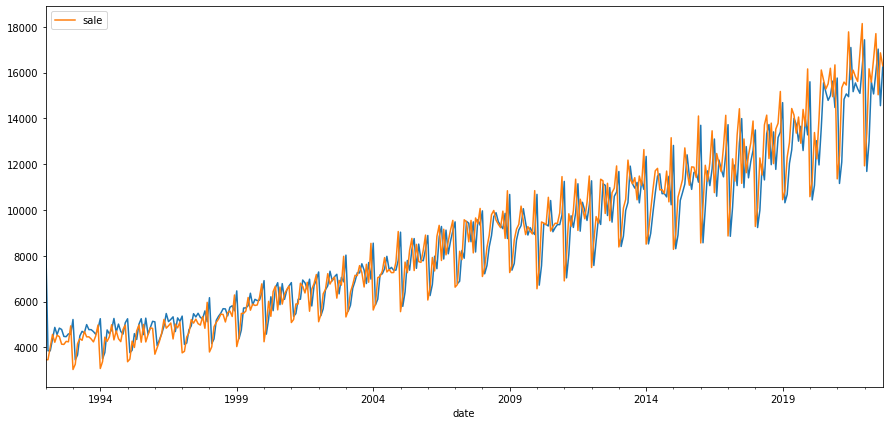

In [12]:
import statsmodels.api as sm 
import pylab as py 
  
# np.random generates different random numbers everytime the code is executed.
data_points = np.random.normal(0, 1, 100)     
  
sm.qqplot(data_points, line ='45') 

In [18]:
t["forecast"] = fc
t

,sale,forecast
date,,
1992-01-01,3459,8659.745294
1992-02-01,3458,3848.204577
1992-03-01,4002,3847.279413
1992-04-01,4564,4350.568462
1992-05-01,4221,4870.510456
...,...,...
2022-05-01,16600,15065.814342
2022-06-01,17700,16005.780653
2022-07-01,15031,17023.460714


In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
mean_squared_error(t["sale"], t["forecast"], squared=False)

1413.1972055066667

<AxesSubplot:xlabel='date'>

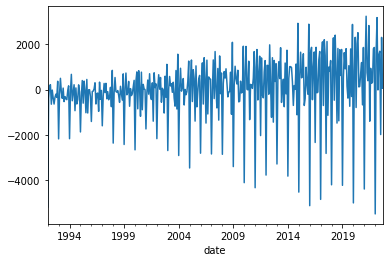

In [21]:
r = model_fit.resid
r.plot()

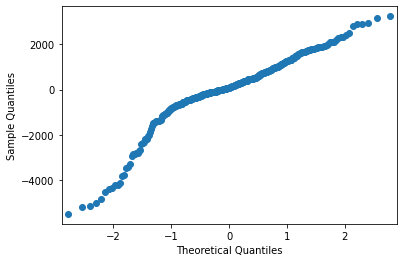

In [33]:
import statsmodels.api as sm 
sm.qqplot(r.values); 

<AxesSubplot:>

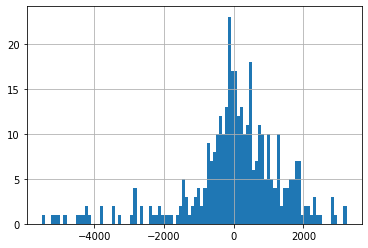

In [23]:
r.hist(bins=100)

# Подбор оптимальных параметров

In [34]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [45]:
t2 = t.diff()[1:]
t2.head()

,sale
date,
1992-02-01,-1.0
1992-03-01,544.0
1992-04-01,562.0
1992-05-01,-343.0
1992-06-01,308.0


/home/frodos/.pyenv/versions/3.8.10/envs/ds/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


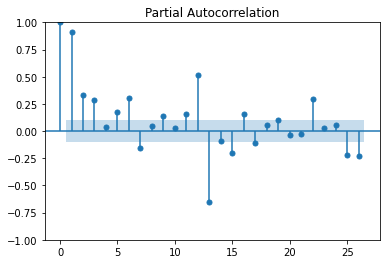

In [38]:
plot_pacf(t);

/home/frodos/.pyenv/versions/3.8.10/envs/ds/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


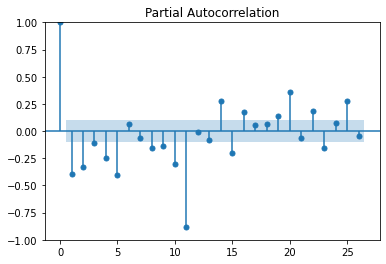

In [46]:
plot_pacf(t2);

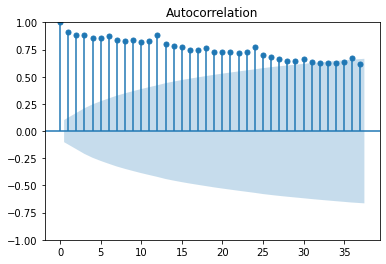

In [47]:
plot_acf(t, lags=37);

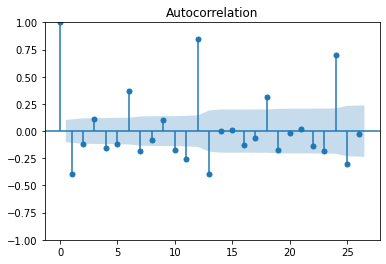

In [49]:
plot_acf(t2);

/home/frodos/.pyenv/versions/3.8.10/envs/ds/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/frodos/.pyenv/versions/3.8.10/envs/ds/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/frodos/.pyenv/versions/3.8.10/envs/ds/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/frodos/.pyenv/versions/3.8.10/envs/ds/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<AxesSubplot:xlabel='date'>

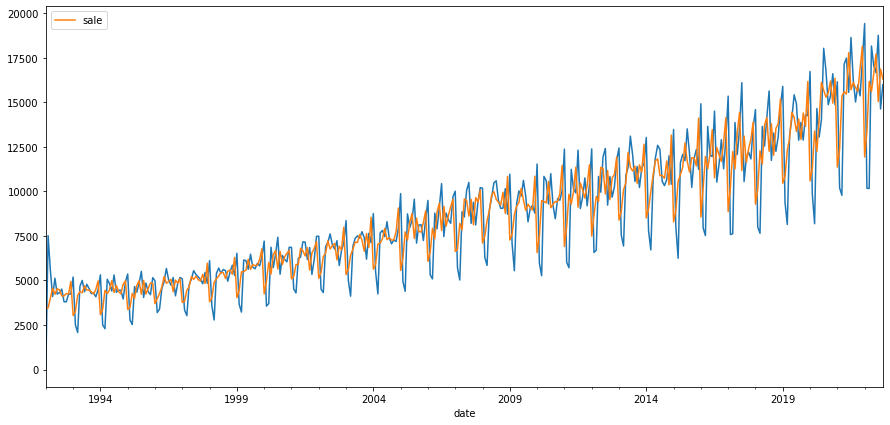

In [52]:
model_fit = ARIMA(t, order=(1, 3, 1)).fit()

fc = model_fit.predict()

fig, ax = plt.subplots(1,1, figsize=(15, 7))
fc.plot(ax=ax)
t.plot(ax=ax)

# Добавим сенность

In [53]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [54]:
model = SARIMAX(t, order=(5, 1, 1), seasonal_order=(2, 4, 1, 12)).fit()
fc = model_fit.predict() 

/home/frodos/.pyenv/versions/3.8.10/envs/ds/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/frodos/.pyenv/versions/3.8.10/envs/ds/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.36790D+00    |proj g|=  3.51634D-02


 This problem is unconstrained.



At iterate    5    f=  8.29671D+00    |proj g|=  2.73334D-03

At iterate   10    f=  8.29638D+00    |proj g|=  1.57018D-03

At iterate   15    f=  8.29583D+00    |proj g|=  4.79295D-03

At iterate   20    f=  8.29358D+00    |proj g|=  9.88585D-03

At iterate   25    f=  8.29186D+00    |proj g|=  1.00777D-02

At iterate   30    f=  8.29062D+00    |proj g|=  1.95007D-02

At iterate   35    f=  8.28981D+00    |proj g|=  1.37880D-02

At iterate   40    f=  8.28900D+00    |proj g|=  1.54872D-02

At iterate   45    f=  8.28837D+00    |proj g|=  3.40144D-03

At iterate   50    f=  8.28800D+00    |proj g|=  1.30810D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/frodos/.pyenv/versions/3.8.10/envs/ds/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='date'>

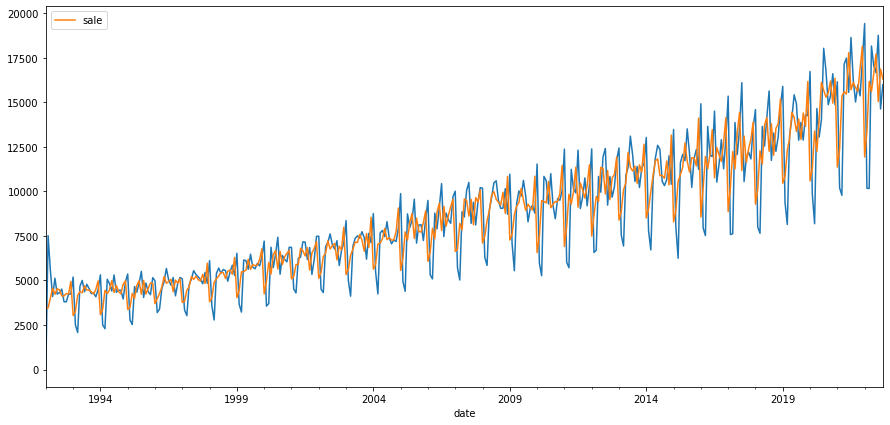

In [55]:
fig, ax = plt.subplots(1,1, figsize=(15, 7))
fc.plot(ax=ax)
t.plot(ax=ax)

/home/frodos/.pyenv/versions/3.8.10/envs/ds/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/frodos/.pyenv/versions/3.8.10/envs/ds/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.27959D+00    |proj g|=  4.56268D-01


 This problem is unconstrained.



At iterate    5    f=  7.20522D+00    |proj g|=  9.67014D-03

At iterate   10    f=  7.20479D+00    |proj g|=  7.88470D-03

At iterate   15    f=  7.20475D+00    |proj g|=  3.87812D-04

At iterate   20    f=  7.20464D+00    |proj g|=  5.35710D-03

At iterate   25    f=  7.19996D+00    |proj g|=  6.29555D-02

At iterate   30    f=  7.19516D+00    |proj g|=  2.04673D-03

At iterate   35    f=  7.19509D+00    |proj g|=  8.91613D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     36     41      1     0     0   3.525D-05   7.195D+00
  F =   7.1950925055674526     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

<AxesSubplot:xlabel='date'>

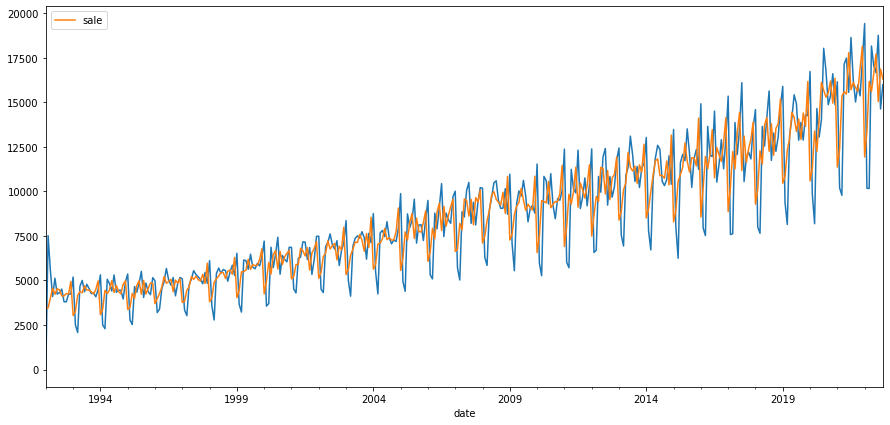

In [56]:
model = SARIMAX(t, order=(5, 1, 1), seasonal_order=(2, 1, 0, 12), trend="ct").fit()
fc = model_fit.predict()
fig, ax = plt.subplots(1,1, figsize=(15, 7))
fc.plot(ax=ax)
t.plot(ax=ax)